# Getting Started

This Jupyter Notebook introduces the basic tools needed to complete the digital image processing assignments in [TDT4195](https://www.ntnu.edu/studies/courses/TDT4195/) using the Python programming language.

The notebook assumes that the following Python packages have been installed:

* [NumPy](http://www.numpy.org/)
* [Pillow](https://python-pillow.org/)
* [SciPy](https://www.scipy.org/)
* [matplotlib](http://matplotlib.org/)
* [scikit-image](http://scikit-image.org/)

If you are new to Jupyter notebook, then please have a look at the [Jupyter](https://jupyter.org/) website.

In [1]:
def fib(n):
    return n if n < 2 else fib(n - 1) + fib(n - 2)

list(map(fib, range(15)))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

To run a notebook cell like the one above, all you have to do is hit **Shift-Enter** with the cell selected.

## NumPy

NumPy is a commonly used Python package that adds n-dimensional array objects and several tools for working with them. For MATLAB users wanting to use Python, we recommend taking a look at the [NumPy_for_Matlab_Users](http://scipy.github.io/old-wiki/pages/NumPy_for_Matlab_Users) tutorial.

The n-dimensional array, or [`numpy.ndarray`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.html), is the fundamental component of both NumPy and SciPy. This section outlines some of the basic routines that can be done using these arrays.

As with all Python packages: they have to be imported before use. NumPy is no different, and the most common way to import it can be seen below:

In [2]:
import numpy as np

### Arrays

NumPy arrays can be initialised in several different ways. The two most common ways are: (i) create them from, possibly nested, Python lists and (ii) create vectors and matrices of all zeros, ones, or a constant value.

Here we create an array with rank 1 from a Python list using the [`numpy.array`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.array.html) function:

In [3]:
np.array([1,2,3,4,5,6,7,8,9])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

The rank of a NumPy array is simply the number of dimensions of the array.

While creating the array, we can specify its data type. For example:

In [4]:
np.array([1,2,3,4,5,6,7,8,9], dtype=np.int8)     # 8-bit integer (-128 to 127)

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [5]:
np.array([1,2,3,4,5,6,7,8,9], dtype=np.uint8)    # 8-bit unsigned integer (0 to 255)

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
np.array([1,2,3,4,5,6,7,8,9], dtype=np.float32)  # 32-bit single precision float

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.], dtype=float32)

The [`numpy.iinfo`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.iinfo.html) and [`numpy.finfo`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.finfo.html) functions can be used to inspect the machine limits for integer and floating point types, respectively. For instance:

In [7]:
print('int8: [{}, {}]'.format(np.iinfo(np.int8).min, np.iinfo(np.int8).max))
print('float32: [{:.0f}, {:.0f}]'.format(np.finfo(np.float32).min, np.finfo(np.float32).max))

int8: [-128, 127]
float32: [-340282346638528859811704183484516925440, 340282346638528859811704183484516925440]


Here's an example showcasing what happens when we try to create an array with numbers outside of what the data type expects.

In [8]:
np.array([-300, -50, -1, 0, 1, 50, 300], dtype=np.uint8)

array([212, 206, 255,   0,   1,  50,  44], dtype=uint8)

Unsurprisingly, we get integer overflow.

It is generally a good idea to explicitly state the type when working with any kind of non-trivial data.

Below are several examples where arrays are created using the [`numpy.zeros`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.zeros.html), [`numpy.ones`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ones.html), and [`numpy.full`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.full.html) functions. Each is created using a tuple that describe the shape of the desired array. The elements of these tuples are the number of rows and columns, respectively.

In [9]:
np.zeros((1,3))  # 1x3 row vector of zeros

array([[ 0.,  0.,  0.]])

In [10]:
np.zeros((3,1), dtype=np.float32)  # 3x1 column vector of zeros with an explicit data type 

array([[ 0.],
       [ 0.],
       [ 0.]], dtype=float32)

In [11]:
np.ones((3,3))  # 3x3 matrix of ones

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [12]:
np.full((5,5), 4, dtype=np.int8)  # 5x5 matrix with the constant value 4

array([[4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4]], dtype=int8)

The [`numpy.eye`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.eye.html) function can be used to create arbitrary identity matrices.

In [13]:
np.eye(4)  # 4x4 identity matrix

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

It is also possible to create arrays with random values (for example [`numpy.random.random`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.random.random.html)):

In [14]:
np.random.random((3,4))  # 3x4 matrix with uniformly sampled values from the interval [0.0, 1.0)

array([[ 0.54598566,  0.17470766,  0.24662345,  0.29500231],
       [ 0.27786682,  0.00737714,  0.39773379,  0.37026993],
       [ 0.81872403,  0.84340038,  0.9499768 ,  0.05120608]])

### Array indexing

NumPy arrays are indexed using standard Python syntax, e.g. `x[i]`, where `x` is an array and `i` is the element we are interested in. Indexing in Python is 0-based, which means that indexing starts from `0`. Let's create a vector and a matrix and see how it can be indexed. Notice how the array `mat` is initialised with a nested Python list.

In [15]:
vec = np.array([1,2,3,4,5,6], np.uint8)

mat = np.array([[1, 2, 3, 4],
                [5, 6, 7, 8],
                [9,10,11,12]], dtype=np.uint8)

Each element can be indexed like this:

In [16]:
vec[4]  # Fifth element

5

In [17]:
mat[2,1]  # Third row, second column

10

Notice that for matrices, the first element denotes the row, while the second denotes the column.

NumPy arrays can be sliced by passing a *slice* object which has the following form: `start:stop:stride`. For example:

In [18]:
vec[0:3]  # Only start and stop is used, the stride is 1

array([1, 2, 3], dtype=uint8)

In [19]:
vec[0:6:2]  # View every second element, starting from the first

array([1, 3, 5], dtype=uint8)

In [20]:
mat[1:3, 2:4]  # View second to third row + third to fourth column

array([[ 7,  8],
       [11, 12]], dtype=uint8)

In [21]:
mat[0:3:2,0:4:2]  # View every second row and column

array([[ 1,  3],
       [ 9, 11]], dtype=uint8)

When the colon operator `:` is used alone, it allows you to retrieve all elements in a particular dimension.

In [22]:
mat[1,:]

array([5, 6, 7, 8], dtype=uint8)

Negative indices can be used to index an array backwards.

In [23]:
vec[-1]

6

In [24]:
mat[-1, -1]

12

### Basic operations

Let's define a NumPy array called `matrix` and see if we can perform some operations on it.

In [25]:
matrix = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]], dtype=np.uint8)
print(matrix)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


NumPy arrays have a slew of attributes that can be useful when you want more information about an array.

[`numpy.ndarray.shape`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.shape.html) returns a tuple with the array shape.

In [26]:
matrix.shape

(4, 4)

[`numpy.ndarray.ndim`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.ndim.html) returns the number of dimensions (often referred to as *rank*).

In [27]:
matrix.ndim

2

[`numpy.ndarray.size`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.size.html) returns the total number of elements.

In [28]:
matrix.size

16

[`numpy.ndarray.dtype`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.dtype.html) returns the data type

In [29]:
matrix.dtype

dtype('uint8')

NumPy arrays can be *reshaped* to some other shape using [`numpy.reshape`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.reshape.html) or [`numpy.ndarray.reshape`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.reshape.html). The total number of elements in the reshaped array must, of course, remain the same.

In [30]:
np.reshape(matrix, (2, 8))

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16]], dtype=uint8)

Additionally, an array can be flattened to a 1D vector by using either [`numpy.ravel`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ravel.html) or [`numpy.ndarray.flatten`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.flatten.html).

In [31]:
np.ravel(matrix)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16], dtype=uint8)

The data type of an array can be changed using the [`numpy.ndarray.astype`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.astype.html) function. This is very useful when you, for instance, have loaded data in a data type you do not want to use, or want to apply an operation that would better fit a different data type.

In [32]:
matrix.astype(np.float32)

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.],
       [  9.,  10.,  11.,  12.],
       [ 13.,  14.,  15.,  16.]], dtype=float32)

An array can be transposed using [`numpy.transpose`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.transpose.html) or[`numpy.ndarray.T`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.T.html).

In [33]:
matrix.T

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]], dtype=uint8)

Note that arrays of rank 1 must be promoted to rank 2 before transpose will work as intended.

In [34]:
vec = np.array([1,2,3])
print('Shape before', vec.shape, ', Shape after', vec.T.shape)
print(vec.T)  # Nothing seems to happen

vec2 = vec[np.newaxis, :]
print('\nShape before', vec2.shape, ', Shape after', vec2.T.shape)
print(vec2.T)  # Transpose works as intended

Shape before (3,) , Shape after (3,)
[1 2 3]

Shape before (1, 3) , Shape after (3, 1)
[[1]
 [2]
 [3]]


Pointwise operations are done using standard Python arithmetic operators.

In [35]:
matrix + 2  # Equivalent to np.add(matrix, 2)

array([[ 3,  4,  5,  6],
       [ 7,  8,  9, 10],
       [11, 12, 13, 14],
       [15, 16, 17, 18]], dtype=uint8)

In [36]:
matrix * 2  # Equivalent to np.multiply(matrix, 2)

array([[ 2,  4,  6,  8],
       [10, 12, 14, 16],
       [18, 20, 22, 24],
       [26, 28, 30, 32]], dtype=uint8)

In [37]:
matrix // 2  # Integer division, equivalent to np.floor_divide(matrix, 2)

array([[0, 1, 1, 2],
       [2, 3, 3, 4],
       [4, 5, 5, 6],
       [6, 7, 7, 8]], dtype=uint8)

In [38]:
matrix / 2  # Division, equivalent to np.divide(matrix, 2)

array([[ 0.5,  1. ,  1.5,  2. ],
       [ 2.5,  3. ,  3.5,  4. ],
       [ 4.5,  5. ,  5.5,  6. ],
       [ 6.5,  7. ,  7.5,  8. ]])

In [39]:
np.sqrt(matrix)  # Square root

array([[ 1.        ,  1.4140625 ,  1.73242188,  2.        ],
       [ 2.23632812,  2.44921875,  2.64648438,  2.828125  ],
       [ 3.        ,  3.16210938,  3.31640625,  3.46484375],
       [ 3.60546875,  3.7421875 ,  3.87304688,  4.        ]], dtype=float16)

In [40]:
matrix.astype(np.uint16) ** 3  # Exponentiation where the exponent is 3
# Equivalent to np.power(matrix.astype(np.uint16), 3)

array([[   1,    8,   27,   64],
       [ 125,  216,  343,  512],
       [ 729, 1000, 1331, 1728],
       [2197, 2744, 3375, 4096]], dtype=uint16)

In the exponentiation example above, we changed the data type to `uint16` using the [`numpy.ndarray.astype`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.astype.html) function because some of the elements in the resulting matrix are larger than 255 (8-bit).

In [41]:
twos = np.full((4,4), 2, dtype=np.uint8)  # 3x3 matrix of all twos

matrix * twos  # Equivalent to np.multiply(matrix, twos)

array([[ 2,  4,  6,  8],
       [10, 12, 14, 16],
       [18, 20, 22, 24],
       [26, 28, 30, 32]], dtype=uint8)

In the example above, notice that the multiplication of the two matrices did **not** yield the matrix multiplication operation; it simply multiplied each element by `2`. To do matrix multiplication the [`numpy.dot`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.dot.html) or [`numpy.ndarray.dot`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.dot.html) function must be used.

In [42]:
np.dot(matrix, twos)  # Equivalent to matrix.dot(twos)

array([[ 20,  20,  20,  20],
       [ 52,  52,  52,  52],
       [ 84,  84,  84,  84],
       [116, 116, 116, 116]], dtype=uint8)

For 1D arrays the [`numpy.dot`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.dot.html) function is equivalent to the inner product of two vectors.

In [43]:
np.dot([1,2,3], [2,2,2])  # 1*2 + 2*2 + 3*2 = 12

12

Another simple operation between two vectors is the outer product: $u \otimes v = uv^\intercal$ ([`numpy.outer`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.outer.html)).

In [44]:
u = np.array([1,2,1], dtype=np.float32)
v = np.array([1,2,1], dtype=np.float32)

np.outer(u, v)  # Equivalent to u * np.array([v]).T

array([[ 1.,  2.,  1.],
       [ 2.,  4.,  2.],
       [ 1.,  2.,  1.]], dtype=float32)

Be sure to check out the [full overview](https://docs.scipy.org/doc/numpy/reference/routines.math.html) over all of the basic mathematical operations that can be applied to NumPy arrays.

### Array copy

Simple assignments do not make copies of an array object.

In [45]:
a = np.array([1,2,3,4,5])
b = a
b is a

True

To make a complete copy of an array the [`numpy.copy`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.copy.html) or [`numpy.ndarray.copy`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.copy.html) function can be used. This is generally referred to as a *deep copy*.

In [46]:
a = np.array([1,2,3,4,5])
b = a.copy()
b is a

False

Another option is to create a new array using the data of the old array. In the following example the type of the new array `b` is defined implicitly.

In [47]:
a = np.array([1,2,3,4,5])
b = np.array(a)
b is a

False

## Basic plotting with matplotlib

The most common way to interface with matplotlib is by importing [`matplotlib.pyplot`](https://matplotlib.org/api/pyplot_api.html). `%matplotlib inline` is a Jupyter notebook command which allow us to plot inline and is not to be used in a regular Python script.

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

Let's plot a simple line. The [`numpy.linspace`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.linspace.html) function returns a NumPy array with evenly spaced numbers over a specified interval.

f: [ 0.  1.  2.  3.  4.  5.] -> [ 0.  1.  2.  3.  4.  5.]


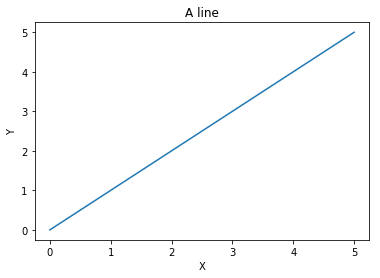

In [49]:
xs = np.linspace(0, 5, 6)  # 6 points between 0 and 5
print('f: {} -> {}'.format(xs, xs))

plt.figure()
plt.plot(xs, xs)
plt.title('A line')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Here is another example where we superimpose two sinusoidal curves.

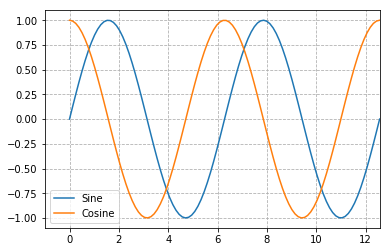

In [50]:
xs = np.linspace(0, 4*np.pi, 100)  # 100 points in the interval [0 and 4*pi]
ys_sin = np.sin(xs)
ys_cos = np.cos(xs)

plt.figure()
plt.plot(xs, ys_sin, label='Sine')
plt.plot(xs, ys_cos, label='Cosine')
plt.xlim(-1, 4*np.pi)  # Limit what is displayed in the x direction
plt.legend()  # Requires that each curve has a label
plt.grid(linestyle='dashed')
plt.show()

Arbitrary functions can be plotted as well. For example, a 1D [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution): $\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$.

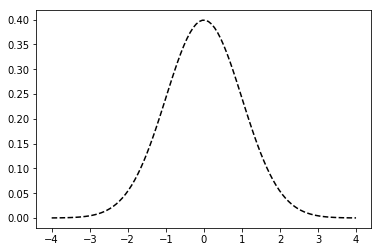

In [51]:
xs = np.linspace(-4, 4, 100)  # 100 points between -4 and 4

sigma = 1.0
mu = 0.0
ys = np.exp(-(xs - mu)**2 / (2 * sigma**2))
ys /= np.sqrt(2 * np.pi * sigma**2)

plt.figure()
plt.plot(xs, ys, linestyle='dashed', color='black')
plt.show()

As before, plots can be superimposed. Here we let the Gaussian probability density function be an anonymous function to make it easier for us to create several plots.

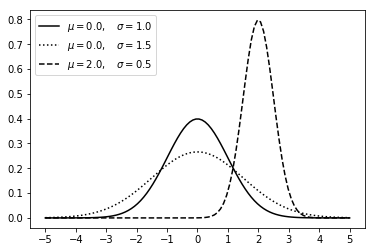

In [52]:
normal = lambda xs, mu, sigma: np.exp(-(xs - mu)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)

xs = np.linspace(-5, 5, 100)

plt.figure()
plt.plot(xs, normal(xs, 0.0, 1.0), linestyle='solid',
         color='black', label=r'$\mu=0.0,\quad\sigma=1.0$')
plt.plot(xs, normal(xs, 0.0, 1.5), linestyle='dotted',
         color='black', label=r'$\mu=0.0,\quad\sigma=1.5$')
plt.plot(xs, normal(xs, 2.0, 0.5), linestyle='dashed',
         color='black', label=r'$\mu=2.0,\quad\sigma=0.5$')
plt.xticks(np.arange(-5, 5+1))
plt.legend()
plt.show()

## Loading and saving images

Many Python libraries that offer loading and saving of images simply use the API provided by *PIL* (Python Imaging Library) or the more recent fork: *Pillow*. In this guide, SciPy will be used as a wrapper to load images because it loads them straight into NumPy arrays.

In [53]:
from scipy import misc

Reading and saving images can be done using the [`scipy.misc.imread`](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.misc.imread.html) and [`scipy.misc.imsave`](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.misc.imsave.html) functions, respectively.

## Images as NumPy arrays

Now that we know how to load images, let's load an image and display it using matplotlib.

In [54]:
image = misc.imread('./house.tiff')

For completeness, here's how the same image could have been loaded and put into a NumPy array using PIL or Pillow:

In [55]:
from PIL import Image

img = Image.open('./house.tiff')
img = np.array(img)

print(np.array_equal(image, img))

del img

True


Now, let's display the image we loaded before using matplotlib. In this example, the pixel interpolation has been forced to use nearest neighbour. This is especially useful when dealing with small images as we can see each pixel clearly.

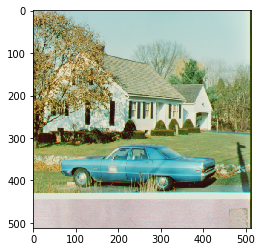

In [56]:
plt.figure()
plt.imshow(image, interpolation='nearest')
plt.show()

Seeing as we've loaded the image in a NumPy array, we can use everything we learned above to modify it. For example, let's try to transform it using the natural logarithm.

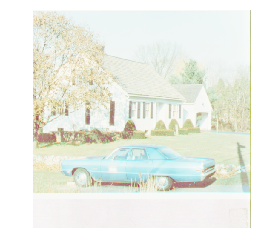

In [57]:
imagelog = image.astype(np.float32)
c = 255 / np.log(np.max(imagelog) + 1)  # Scaling
imagelog = c * np.log(imagelog + 1)
imagelog = imagelog.astype(np.uint8)

plt.figure()
plt.imshow(imagelog)
plt.axis('off')  # Turn of axis numbers and ticks
plt.show()

A simple colour image consists of three so-called colour channels: red, green, and blue. This means that `image` is in fact a three-dimensional array with the following shape:

In [58]:
image.shape

(512, 512, 3)

The first and second axis are the rows and columns respectively, while the last axis is the number of channels. The channels can be operated on separately. The following exemplifies how each channel can be plotted on its own using subplots:

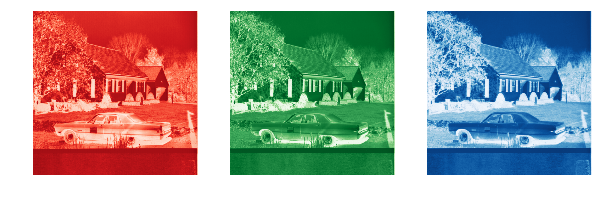

In [59]:
r = image[..., 0]  # Equivalent to image[:, :, 0]
g = image[..., 1]
b = image[..., 2]

_, ax = plt.subplots(1, 3, figsize=(10, 8))
ax[0].imshow(r, cmap=plt.cm.Reds)  # Red colour map
ax[0].set_axis_off()
ax[1].imshow(g, cmap=plt.cm.Greens)  # Green colour map
ax[1].set_axis_off()
ax[2].imshow(b, cmap=plt.cm.Blues)  # Blue colour map
ax[2].set_axis_off()
plt.show()

With this in mind we can try to rearrange the colour channels to BGR instead of RGB. In the following example we add the previously indexed colour channels to an empty image.

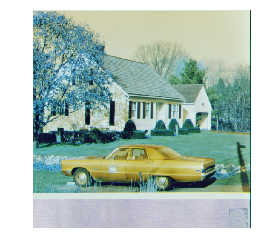

In [60]:
rearranged = np.zeros_like(image)  # Can also use: np.zeros(image.shape, dtype=image.dtype)
rearranged[:, :, 0] = b
rearranged[:, :, 1] = g
rearranged[:, :, 2] = r

plt.figure()
plt.imshow(rearranged)
plt.axis('off')
plt.show()

For now, let's assume that the red colour channel is a greyscale image.

In [61]:
grey = image[..., 0]  # Equivalent to image[:, :, 0]
grey.shape

(512, 512)

When displaying an image with a single colour channel, such as a greyscale image, it is important to specify the correct colour map. In this case, it would be natural to use the `matplotlib.cm.gray` colour map. If this is not done, matplotlib will elect to use the default colour map instead. See the difference below.

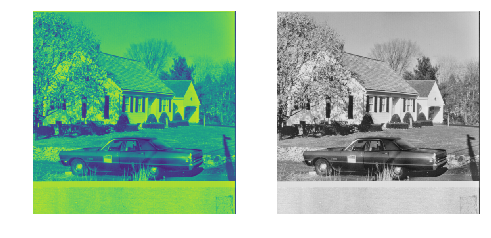

In [62]:
_, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(grey)  # No colour map specified!
ax[0].set_axis_off()
ax[1].imshow(grey, cmap=plt.cm.gray)
ax[1].set_axis_off()
plt.show()

Earlier it was mentioned how forcing nearest neighbour interpolation can be useful when we want to see each pixel clearly. Here's an example where we see the difference between two interpolation types: `nearest` and `bilinear`. Notice how a slice object has been used to inspect a smaller region of the image.

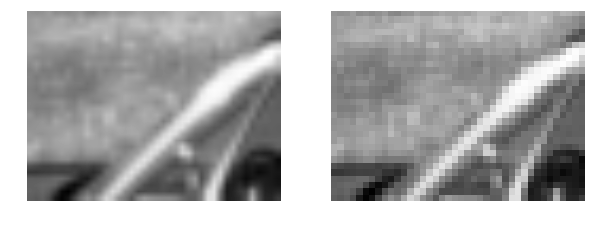

In [63]:
cropped = grey[320:350, 160:200]

_, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].imshow(cropped, interpolation='bilinear', cmap=plt.cm.gray)
ax[0].set_axis_off()
ax[1].imshow(cropped, interpolation='nearest', cmap=plt.cm.gray)
ax[1].set_axis_off()
plt.show()

Seeing as images are NumPy arrays, we can index them just like we did above. For example, we can inspect pixel intensities in a greyscale image like this:

In [64]:
grey[100, 40]

188

When inspecting pixel intensities in a colour image, it is important to note that there are three values instead of one value.

In [65]:
image[100, 40]

array([188, 193, 156], dtype=uint8)

### Image histogram

An image histogram is a representation where we count up the number of times an intensity occurs in an image. Using basic probability, we can normalise the image histogram to get an estimate of the probability of any intensity level occurring in the image. The following code snippet visualises an image histogram for a greyscale image:

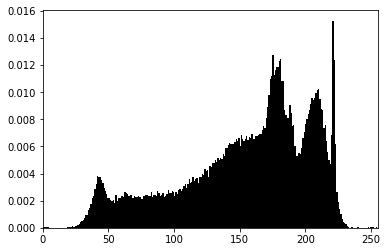

In [66]:
hist = np.zeros((256), dtype=np.float32)

for i in range(len(hist)):
    hist[i] = (grey == i).sum()

bins = np.linspace(0, 255, 256 + 1, endpoint=True)

# NumPy style normalisation
hist = hist / np.diff(bins) / hist.sum()

plt.figure()
plt.bar(bins[:-1], hist, width=1, linewidth=0, color='black')
plt.xlim(0, 255)
plt.show()

NumPy has a function called [`numpy.histogram`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.histogram.html) that enable us to create histograms of arbitrary arrays with ease.

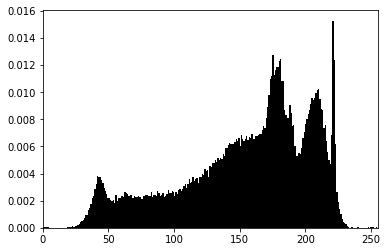

In [67]:
hist, bins = np.histogram(grey, bins=256, range=(0, 255), density=True)

plt.figure()
plt.bar(bins[:-1], hist, width=1, linewidth=0, color='black')
plt.xlim(0, 255)
plt.show()

It is also possible to create a colour image histogram by superimposing three histograms, one for each colour channel.

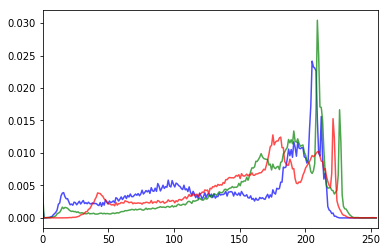

In [68]:
red_hist, red_bins = np.histogram(r, bins=256, range=(0, 255), density=True)
green_hist, green_bins = np.histogram(g, bins=256, range=(0, 255), density=True)
blue_hist, blue_bins = np.histogram(b, bins=256, range=(0, 255), density=True)

# Using `plot` instead of `bar` to make it easier to see each histogram
plt.figure()
plt.plot(blue_bins[:-1], blue_hist, alpha=0.7, color='b')
plt.plot(green_bins[:-1], green_hist, alpha=0.7, color='g')
plt.plot(red_bins[:-1], red_hist, alpha=0.7, color='r')
plt.xlim(0, 255)
plt.show()

### Simple thresholding

NumPy arrays can be indexed using a mask of boolean values. For example:

In [69]:
grey > 128

array([[False,  True, False, ...,  True,  True,  True],
       [False,  True,  True, ...,  True, False, False],
       [False,  True,  True, ...,  True, False, False],
       ..., 
       [False,  True,  True, ...,  True, False, False],
       [False,  True,  True, ...,  True, False, False],
       [False,  True,  True, ...,  True, False, False]], dtype=bool)

With this in mind, we can easily do thresholding on an image if we have a threshold value. In this example, all pixel intensities above `128` will be set to `255`, while all other pixel intensities are set to `0`. Notice how the image is indexed using the boolean mask created by the threshold.

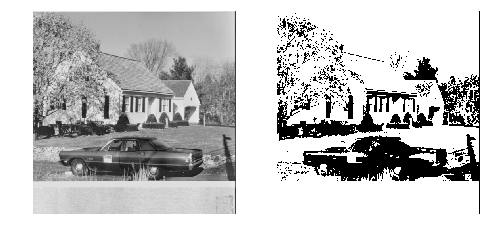

In [70]:
threshold = 128
thresholded_image = np.zeros_like(image)
thresholded_image[grey > threshold] = 255

_, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(grey, cmap=plt.cm.gray)
ax[0].set_axis_off()
ax[1].imshow(thresholded_image, cmap=plt.cm.gray)
ax[1].set_axis_off()
plt.show()

Matplotlib can display binary images as well.

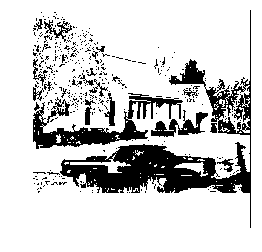

In [71]:
binary_image = grey > threshold

plt.figure()
plt.imshow(binary_image, plt.cm.gray)
plt.axis('off')  # Turns of axis numbers and ticks
plt.show()

### Image traversal

Knowing how to traverse an image in scanline will be quite useful for the assignments. Traversing an image in scanline means that we inspect each pixel, row by row. Below is an example where a checker pattern is mixed together with the image intensities.

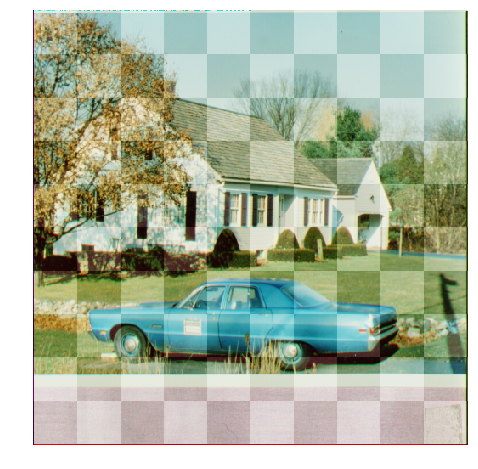

In [72]:
nb_rows = image.shape[0]
nb_cols = image.shape[1]

norm_image = image.astype(np.float) / 255
height, width = norm_image.shape[:-1]

new_image = np.zeros_like(norm_image)

for y in range(nb_rows):
    for x in range(nb_cols):
        # Do something for each pixel here
        a = np.mod(np.floor((y/(height-1)) * 10) + np.floor((x/(width-1)) * 10), 2)
        new_image[y, x] = norm_image[y,x]**0.7 * (1 - a) + norm_image[y,x]**1.3 * a
        

plt.figure(figsize=(8, 8))
plt.imshow(new_image, plt.cm.gray)
plt.axis('off')
plt.show()

### scikit-image

Scikit-image is a highly useful package that contains a collection of image processing and computer vision algorithms. For example, we can use the Canny edge detector ([`skimage.feature.canny`](http://scikit-image.org/docs/dev/api/skimage.feature.html#canny)) to isolate probable edges in a greyscale image.

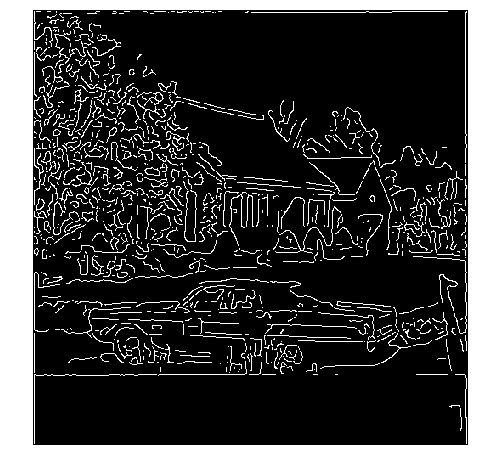

In [73]:
from skimage.feature import canny

norm_grey = grey.astype(np.float) / 255
edges = canny(norm_grey, sigma=2.0, low_threshold=0.1, high_threshold=0.2)

plt.figure(figsize=(8, 8))
plt.imshow(edges, plt.cm.gray)
plt.axis('off')
plt.show()

Here is another example where we use the Harris & Stephens corner detector ([`skimage.feature.corner_harris`](http://scikit-image.org/docs/dev/api/skimage.feature.html#corner-harris)) to identify probable corners. These may be used for further analysis of the image.

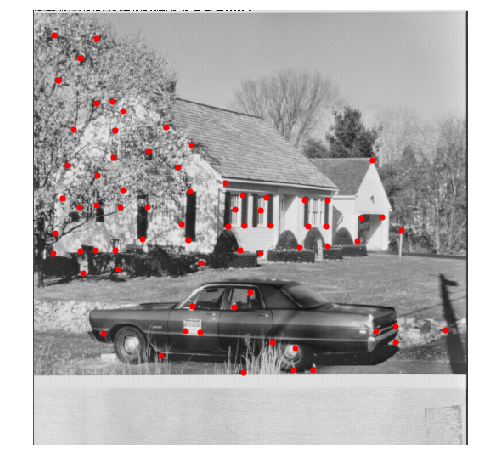

In [74]:
from skimage.feature import corner_harris, corner_peaks

harris = corner_harris(grey, sigma=5)
corners = corner_peaks(harris, min_distance=10)

plt.figure(figsize=(8, 8))
plt.imshow(grey, plt.cm.gray)
plt.plot(corners[:, 1], corners[:, 0], '.r', markersize=10)
plt.axis('off')
plt.show()